In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def vec_diff(traj, i, j) -> list[int]:
    return np.subtract(
        [traj[i][1], traj[i][2], traj[i][3]],
        [traj[j][1], traj[j][2], traj[j][3]]
        )

In [ ]:
def plot_velocity(filename : str, title : str, begin : int, end : int):
    trajectory = []

    with open("data/" + filename + ".a") as file:
        for l, line, in enumerate(file):
            if l >= 10:
                trajectory.append(line.split()[:4])
    
    # find velocities
    velocities = []
    for i in range(5, trajectory.size() - 5):
        T1 = 0.10*((vec_diff(trajectory, i + 5, i))/(trajectory[i + 5][0] - trajectory[i][0]))
        T2 = 0.15*((vec_diff(trajectory, i + 5, i))/(trajectory[i + 5][0] - trajectory[i][0]))
        T3 = 0.25*((vec_diff(trajectory, i + 5, i))/(trajectory[i + 5][0] - trajectory[i][0]))
        T4 = 0.25*((vec_diff(trajectory, i + 5, i))/(trajectory[i + 5][0] - trajectory[i][0]))
        T5 = 0.15*((vec_diff(trajectory, i + 5, i))/(trajectory[i + 5][0] - trajectory[i][0]))
        T6 = 0.10*((vec_diff(trajectory, i + 5, i))/(trajectory[i + 5][0] - trajectory[i][0]))


In [48]:
def plot_height(filename : str, title : str, begin : int, end : int):
    trajectory = []

    with open("data/" + filename + ".a") as file:
        for l, line, in enumerate(file):
            if l >= 10:
                trajectory.append(line.split()[:4])
    
    fig=plt.figure(figsize=(8, 8))
    ax=fig.add_subplot()

    ax.plot([((float(x[0])*0.001)) for x in trajectory[begin * 1000 :end * 1000]],
            [-float(x[2]) for x in trajectory][begin * 1000:end * 1000])
    plt.xlabel("Time [s]")
    plt.ylabel("Height of particle [mm]")
    plt.title("turbulent section")

In [50]:

def plot_trajectory(filename : str, title : str, begin : int, end : int):
    
    trajectory = []

    with open("data/" + filename + ".a") as file:
        for l, line, in enumerate(file):
            if l >= 10:
                trajectory.append(line.split()[:4])
    
    fig=plt.figure(figsize=(8, 8))
    ax=fig.add_subplot(projection='3d')
    
    ax.scatter(
        [ float(x[1]) for x in trajectory][begin * 1000:end * 1000],
        [ float(x[3]) for x in trajectory][begin * 1000:end * 1000],
        [-float(x[2]) for x in trajectory][begin * 1000:end * 1000],
        c=[((float(x[0])*0.001)/(end - begin)) for x in trajectory[begin * 1000 :end * 1000]],
        marker='.')
    
    plt.xlabel("xaxis")
    plt.ylabel("yaxis")
    plt.title(title)
    ax.set_zlabel("zaxis")
    ax.set_zbound(lower=0, upper=110)
    ax.set_xbound(lower=-60, upper=60)
    ax.set_ybound(lower=-60, upper=60)
    plt.show()


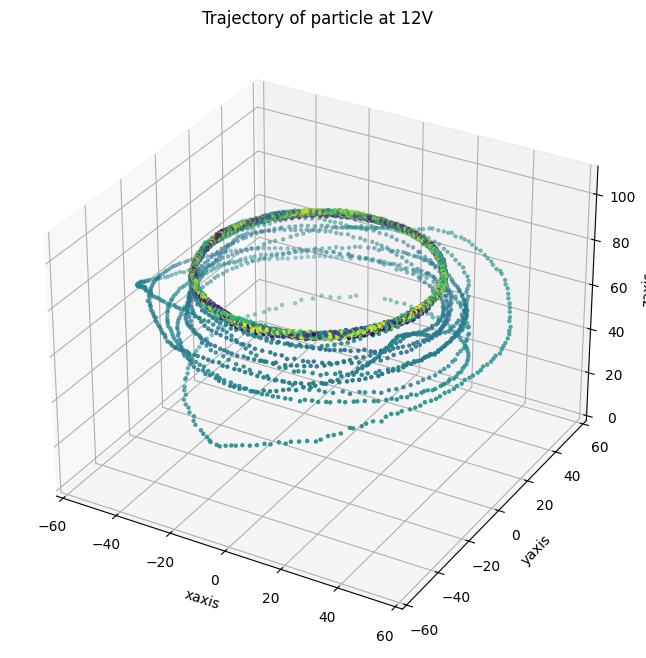

In [53]:
plot_trajectory("m0_12V", "Trajectory of particle at 12V",30,  35)

In [ ]:
plot_height("m0_12V", "Trajectory of particle at 12V",0, 1200)